# Heart Disease Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/User/Desktop/19 Nov ML project/FinalProject/HeartDisease/dataset.csv')

Here we will use three algo - KNN, Decision Tree and Random Forest

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# To predict Target i.e person has heart disease or not

In [13]:
df.shape

(303, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No null values

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

In [17]:
import seaborn as sns

In [21]:
c = df.corr()

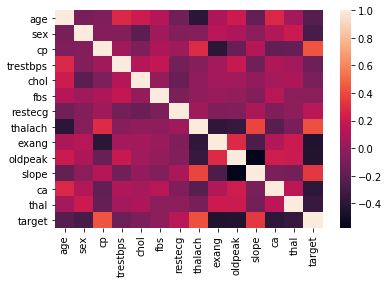

In [20]:
sns.heatmap(df.corr())   # from this we get features like cp, thalach, slope have positive correlation with target

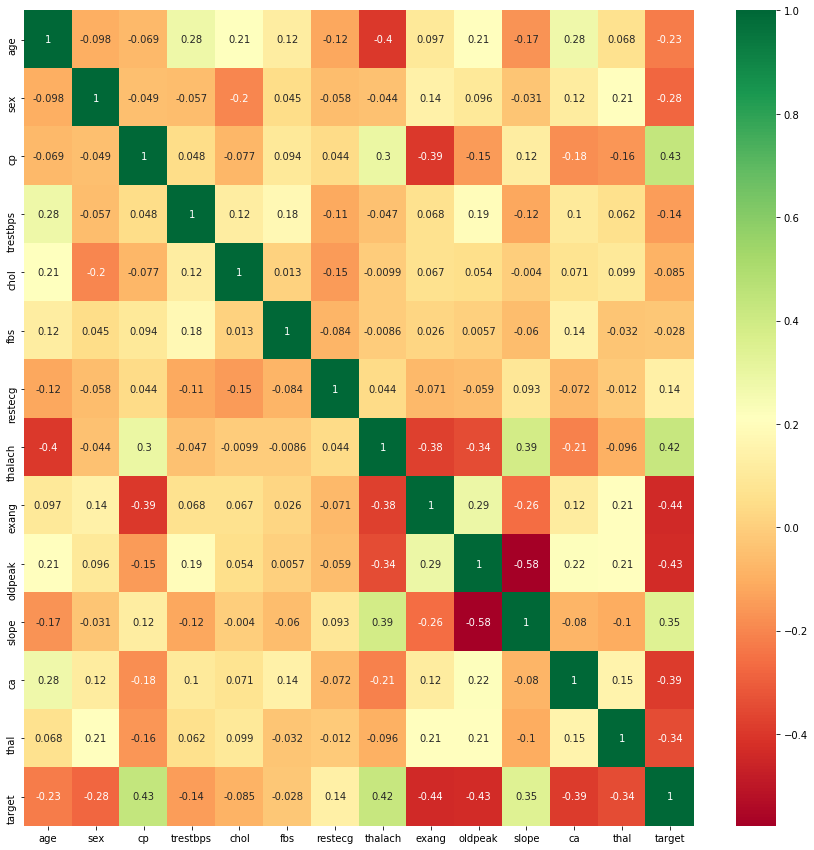

In [28]:
corr_index = c.index
plt.figure(figsize=(15,15))
sns.heatmap(df[corr_index].corr(), annot=True, cmap="RdYlGn")

# To check data is balanced or not

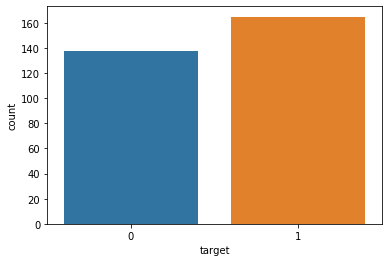

In [29]:
sns.countplot(x='target', data=df)

looks like balanced dataset

# Data Preprocessing

1. Categorical to Dummy

In [32]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Need to convert categorical varibles into dummy variables

In [33]:
data = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [35]:
data.head(3)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


2. Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
col_to_scale = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
obj = StandardScaler()
data[col_to_scale] = obj.fit_transform(data[col_to_scale])

In [42]:
data.head(3)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


# Split data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop(['target'], axis=1)
y = data['target']

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
knn = []
for k in range(1,21):                                # take k from 1 to 20
    kn = KNeighborsClassifier(n_neighbors=k)         
    score = cross_val_score(kn,X,y,cv=10)            
    knn.append(score.mean())                        

In [48]:
score     # for k=20, for cross val 10, we get 20 score in score

array([0.83870968, 0.80645161, 0.83870968, 0.93333333, 0.86666667,
       0.7       , 0.83333333, 0.86666667, 0.73333333, 0.83333333])

In [49]:
knn  # for each k i.e 1 to 20, we get score. Here chhose k with max accuracy

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

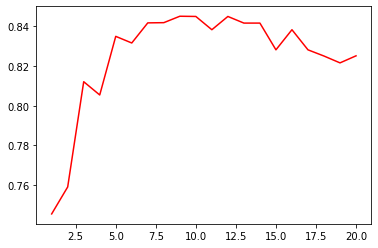

In [52]:
plt.plot([k for k in range(1,21)], knn, color='red')

Text(0, 0.5, 'Scores')

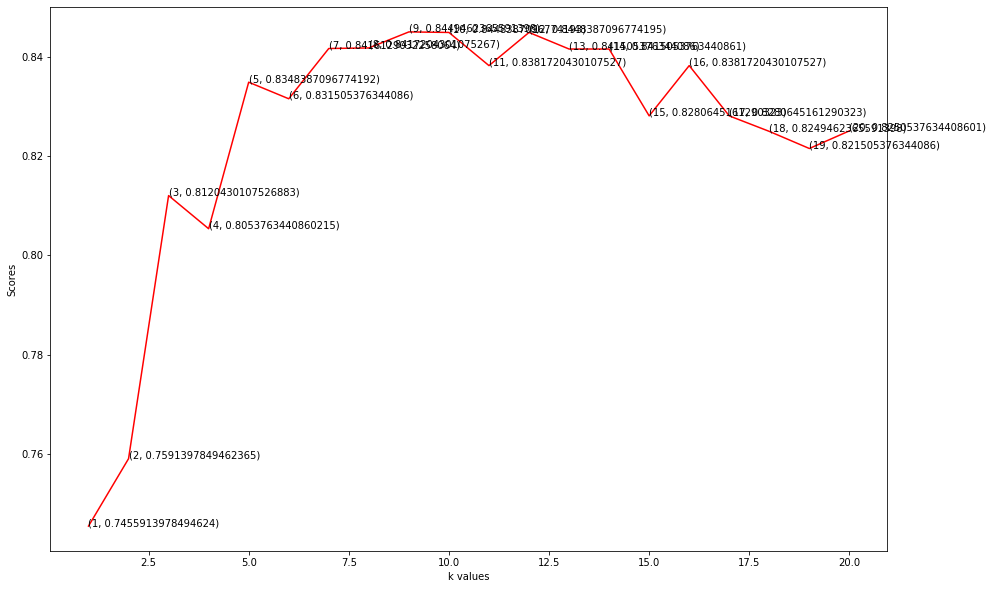

In [64]:
plt.figure(figsize=(15,10))
plt.plot([k for k in range(1,21)], knn, color='red')
for i in range(1,21):
    plt.text(i,knn[i-1], (i,knn[i-1]))
#plt.xticks([i for i in range(1,21)])
plt.xlabel('k values')
plt.ylabel('Scores')

In [69]:
# for k=12, we get max score
kn = KNeighborsClassifier(12)
score = cross_val_score(kn,X,y,cv=10)

In [70]:
score

array([0.90322581, 0.80645161, 0.83870968, 0.93333333, 0.9       ,
       0.8       , 0.83333333, 0.83333333, 0.73333333, 0.86666667])

In [71]:
score.mean()  

0.8448387096774195

For k=12, we get highest accuracy

# Random forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10)    # 10 decision tree
score = cross_val_score(rf_classifier,X,y, cv=10)

In [79]:
score

array([0.74193548, 0.74193548, 0.87096774, 0.86666667, 0.8       ,
       0.73333333, 0.76666667, 0.86666667, 0.7       , 0.83333333])

In [81]:
score.mean()

0.7921505376344087

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
obj = DecisionTreeClassifier()
score = cross_val_score(obj,X,y, cv=10)

In [84]:
score

array([0.83870968, 0.80645161, 0.83870968, 0.8       , 0.66666667,
       0.7       , 0.56666667, 0.83333333, 0.56666667, 0.66666667])

In [85]:
score.mean()

0.7283870967741936

In [87]:
obj1 = DecisionTreeClassifier(max_depth=10)
score = cross_val_score(obj1,X,y, cv=10)
score.mean()

0.7319354838709677

Accuracy - KNN - 84.4%, Random Forest - 79.2% and Decision Tree - 73.1%

Hence will choose KNN with K=12 for prediciton